Final Project 

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

True

In [19]:
"""
N_TRAIN     4224
N_DEV       4278
D           100
C			1
"""
# Standardize Method
def standardize(X):
 return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Grab Data, target, feature order
class Dataset():
    def __init__(self,targetFilename,featureFilename):
        traintarget = np.loadtxt(targetFilename, delimiter=" ")
        trainfeature = np.loadtxt(featureFilename,delimiter=" ")
        self.X = trainfeature
        self.y = traintarget
    # Retrieve X and y based on index
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    # Size of Dataset
    def __len__(self):
        return len(self.X)

In [20]:
# Load Data
train = Dataset("task2_baseball/train.RT","task2_baseball/train.X")
dev = Dataset("task2_baseball/dev.RT","task2_baseball/dev.X")

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

train = Dataset("task2_baseball/train.RT","task2_baseball/train.X")
# Train Set 
X = train.X
y = train.y

# Standardize
X_train = standardize(X)
X_test = standardize(dev.X)

# Initialize neural network with given hyperparameters
model_width = 140
model_depth = 5
hidden_layers = []
for i in range(0, model_depth):
    hidden_layers.append(model_width)
hidden_layers = tuple(hidden_layers)

base_nn = MLPRegressor(hidden_layer_sizes = hidden_layers, activation = 'logistic',
                        alpha = 0.02, learning_rate_init=0.001, early_stopping=True)

base_nn.fit(X, y)

# Make prediction
y_train_pred = base_nn.predict(X_train)

accuracy = mean_squared_error(train.y,y_train_pred)

print("MSE: ", accuracy)

print("R2: ", r2_score(train.y, y_train_pred))

# Make test prediction
y_test_pred = base_nn.predict(X_test)

testaccuracy = mean_squared_error(dev.y,y_test_pred)

print("Test MSE: ", testaccuracy)

print("Test R2: ", r2_score(dev.y, y_test_pred))

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


MSE:  7.50066045312707
R2:  0.4337487364535946
Test MSE:  7.644234605155271
Test R2:  0.38245619260265795


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train = Dataset("task2_baseball/train.RT","task2_baseball/train.X")
# Train Set 
X = train.X
y = train.y

# Standardize
X_train = standardize(X)
X_test = standardize(dev.X)

# Initialize random forest
rand_forest = RandomForestRegressor(n_estimators=1000)
rand_forest.fit(X, y)

# Make prediction
y_train_pred = rand_forest.predict(X_train)
accuracy = mean_squared_error(train.y, y_train_pred)

print("MSE: ", accuracy)

print("R2: ", r2_score(train.y, y_train_pred))

# Make test prediction
y_test_pred = rand_forest.predict(X_test)
testaccuracy = mean_squared_error(dev.y, y_test_pred)

print("Test MSE: ", testaccuracy)

print("Test R2: ", r2_score(dev.y, y_test_pred))

MSE:  12.832484279720164
R2:  0.03123058519446531


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Test MSE:  15.431699185040623
Test R2:  -0.24665852915000608


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

train = Dataset("task2_baseball/train.RT","task2_baseball/train.X")
# Train Set 
X = train.X
y = train.y

# Standardize
X_train = standardize(X)
X_test = standardize(dev.X)

# Define network hyperparameters
model_width = 30
model_depth = 6
ensemble_size = 75
num_epochs = 10

# Initialize list of neural networks
ensemble_list = []
for j in range(0, ensemble_size):
    hidden_layers = []
    for i in range(0, model_depth):
        hidden_layers.append(model_width)
    hidden_layers = tuple(hidden_layers)

    ensemble_list.append((str(j), MLPRegressor(hidden_layer_sizes = hidden_layers, activation = 'logistic',
                        alpha = 0.01, learning_rate_init=0.001, max_iter=600, early_stopping=True)))

# Initialize voting regressor with ensemble list and run for a number of epochs
ensemble = VotingRegressor(ensemble_list)
for i in range(0, num_epochs):
    ensemble.fit(X_train, y)

# Make prediction
y_train_pred = ensemble.predict(X_train)

accuracy = mean_squared_error(train.y,y_train_pred)

print("MSE: ", accuracy)

print("R2: ", r2_score(train.y, y_train_pred))

# Make test prediction
y_test_pred = ensemble.predict(X_test)

testaccuracy = mean_squared_error(dev.y,y_test_pred)

print("Test MSE: ", testaccuracy)

print("Test R2: ", r2_score(dev.y, y_test_pred))

MSE:  6.670296059617598
R2:  0.4964358678024954


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Test MSE:  6.814327937900204
Test R2:  0.44950067116111303


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

train = Dataset("task2_baseball/train.RT","task2_baseball/train.X")

# Train Set 
X = train.X
y = train.y

# Standardize
X_train = standardize(X)
X_test = standardize(dev.X)

# Initialize support vector regressor
sv_machine = SVR(kernel='rbf')

sv_machine.fit(X, y)

# Make prediction
y_train_pred = sv_machine.predict(X_train)

accuracy = mean_squared_error(train.y,y_train_pred)

print("MSE: ", accuracy)

print("R2: ", r2_score(train.y, y_train_pred))

# Make test prediction
y_test_pred = sv_machine.predict(X_test)

testaccuracy = mean_squared_error(dev.y,y_test_pred)

print("Test MSE: ", testaccuracy)

print("Test R2: ", r2_score(dev.y, y_test_pred))

MSE:  8.81353641619492
R2:  0.3346351080454538


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Test MSE:  9.718305359828392
Test R2:  0.2149012159685647


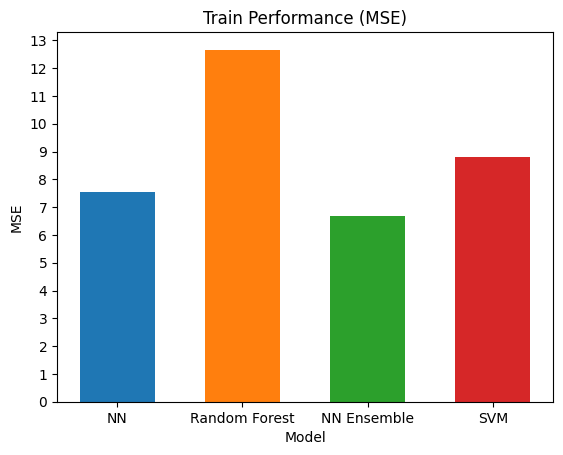

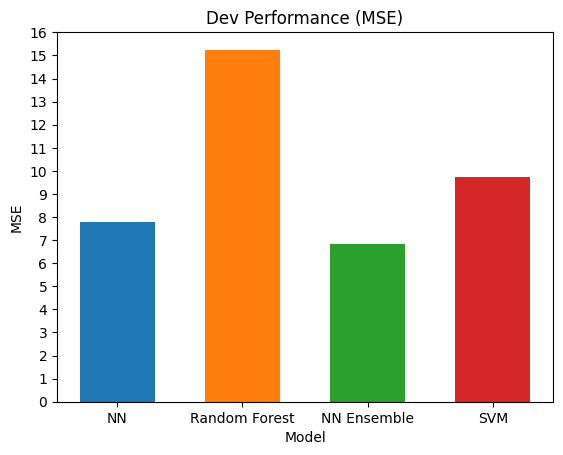

In [ ]:
# Initialize data for plotting

models = ('NN', 'Random Forest',
          'NN Ensemble', 'SVM')
train_perf = np.array([7.53886942650788, 12.661427341936834,
                       6.670296059617598, 8.81353641619492])
dev_perf = np.array([7.786652033101751, 15.25011671845809,
                     6.814327937900204, 9.718305359828392])
width = 0.6

# Plot train results
for i in range(0, len(models)):
    plt.bar(models[i], train_perf[i], width)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.yticks(np.arange(0, max(train_perf)+1, 1))
plt.title('Train Performance (MSE)')

plt.show()

# Plot dev results
for i in range(0, len(models)):
    plt.bar(models[i], dev_perf[i], width)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.yticks(np.arange(0, max(dev_perf)+1, 1))
plt.title('Dev Performance (MSE)')

plt.show()